### **Data Collection**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
customer_data = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Olist_Web_Ecommerce\olist_customers_dataset.csv")
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders_data = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Olist_Web_Ecommerce\olist_orders_dataset.csv")
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders_data = orders_data[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date']] # Select the necessary columns to be analyze

In [6]:
customer_order = orders_data.merge(customer_data, how = 'inner', left_on = 'customer_id', right_on = 'customer_id') 
customer_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [7]:
order_items = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Olist_Web_Ecommerce\olist_order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_items = order_items[['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value']] # Select the necessary columns to be analyze

In [9]:
customer_order_items = order_items.merge(customer_order, how = 'left', left_on = 'order_id', right_on = 'order_id')
customer_order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [10]:
order_payments = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Olist_Web_Ecommerce/olist_order_payments_dataset.csv")

In [11]:
order_payments = order_payments[['order_id', 'payment_type', 'payment_installments', 'payment_value']]

In [12]:
customer_order_payments = customer_order_items.merge(order_payments, how = 'left', left_on = 'order_id', right_on = 'order_id')
customer_order_payments.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,credit_card,3.0,218.04


In [13]:
order_reviews = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Olist_Web_Ecommerce/olist_order_reviews_dataset.csv")

In [14]:
order_reviews = order_reviews[['order_id', 'review_score']]

In [15]:
customer_order_reviews = customer_order_payments.merge(order_reviews, how = 'left', left_on = 'order_id', right_on = 'order_id')
customer_order_reviews.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_type,payment_installments,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,credit_card,2.0,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,credit_card,3.0,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,credit_card,5.0,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,credit_card,2.0,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,credit_card,3.0,218.04,5.0


In [16]:
order_products = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Olist_Web_Ecommerce/olist_products_dataset.csv")

In [17]:
order_products = order_products[['product_id', 'product_category_name']]

In [18]:
customer_order_products = customer_order_reviews.merge(order_products, how = 'left', left_on = 'product_id', right_on = 'product_id')
customer_order_products.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_type,payment_installments,payment_value,review_score,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,credit_card,2.0,72.19,5.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,credit_card,3.0,259.83,4.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,credit_card,5.0,216.87,5.0,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,credit_card,2.0,25.78,4.0,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,credit_card,3.0,218.04,5.0,ferramentas_jardim


In [19]:
sellers = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Olist_Web_Ecommerce/olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
data = customer_order_products.merge(sellers, how = 'left', left_on = 'seller_id', right_on = 'seller_id') # complete table
data.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,...,customer_city,customer_state,payment_type,payment_installments,payment_value,review_score,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,...,campos dos goytacazes,RJ,credit_card,2.0,72.19,5.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,...,santa fe do sul,SP,credit_card,3.0,259.83,4.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,...,para de minas,MG,credit_card,5.0,216.87,5.0,moveis_decoracao,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,...,atibaia,SP,credit_card,2.0,25.78,4.0,perfumaria,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,...,varzea paulista,SP,credit_card,3.0,218.04,5.0,ferramentas_jardim,87900,loanda,PR


In [21]:
data = data.reindex(labels=['order_purchase_timestamp', 'order_delivered_customer_date', 
                                 'order_id', 'order_item_id', 'product_id', 'seller_id', 'customer_id',
                                 'customer_unique_id','product_category_name','price','freight_value',
                                 'payment_value', 'review_score', 'payment_type', 'customer_city',
                                 'customer_state', 'seller_city', 'seller_state',], axis=1) 
#Change order of the column labels 


In [22]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])  # Converting columns with date to datetime64ns format
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

In [23]:
data = data.astype({'product_category_name':'object', 'customer_city':'object', 'payment_type':'object',
                                    'customer_state':'object', 'seller_city':'category', 'seller_state':'category', 
                                    'order_item_id':'int8', 'price':'float64', 'freight_value':'float64','payment_value':'float64',
                                    'review_score':'float16'}) #Change each column to its optimum data type for memory reduction 

In [24]:
data.info()  # Check if data type of each columns are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       118310 non-null  datetime64[ns]
 1   order_delivered_customer_date  115722 non-null  datetime64[ns]
 2   order_id                       118310 non-null  object        
 3   order_item_id                  118310 non-null  int8          
 4   product_id                     118310 non-null  object        
 5   seller_id                      118310 non-null  object        
 6   customer_id                    118310 non-null  object        
 7   customer_unique_id             118310 non-null  object        
 8   product_category_name          116601 non-null  object        
 9   price                          118310 non-null  float64       
 10  freight_value                  118310 non-null  float64       
 11  

### **Data Cleaning**

In [25]:
data.duplicated().sum() #Check if there are any duplcate rows on the complete data table

1106

In [26]:
data = data[~data.duplicated()] # Remove duplicate rows

In [27]:
data.duplicated().sum() # Check again if there are any duplicate rows

0

In [28]:
data.isna().sum() # Check if there are any missing values

order_purchase_timestamp            0
order_delivered_customer_date    2566
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
customer_id                         0
customer_unique_id                  0
product_category_name            1674
price                               0
freight_value                       0
payment_value                       3
review_score                      975
payment_type                        3
customer_city                       0
customer_state                      0
seller_city                         0
seller_state                        0
dtype: int64

In [29]:
data['payment_type'].value_counts(dropna = False) # return unique data values together with the missing value

payment_type
credit_card    86939
boleto         22931
voucher         5639
debit_card      1692
NaN                3
Name: count, dtype: int64

In [30]:
data = data.dropna(subset=['payment_type']) # remove rows with NaN values in payment type column

In [31]:
data['payment_type'].value_counts(dropna = False)

payment_type
credit_card    86939
boleto         22931
voucher         5639
debit_card      1692
Name: count, dtype: int64

In [32]:
data['payment_value'] = data['payment_value'].fillna(data['payment_value'].median())

In [33]:
data['review_score'].value_counts(dropna = False) #dropna=False, check the unique values together with the NaN values

review_score
5.0    65590
4.0    22094
1.0    14725
3.0     9770
2.0     4047
NaN      975
Name: count, dtype: int64

In [34]:
data['review_score'].median()

5.0

In [35]:
data['review_score'] = data['review_score'].fillna(data['review_score'].median())

In [36]:
data['product_category_name'] = data['product_category_name'].astype('string').fillna('others') #fill the 1674 missing values with 'others' as category 
data['product_category_name'] = data['product_category_name'].astype('category')

In [37]:
data.isna().sum() # Check again if there are any missing values

order_purchase_timestamp            0
order_delivered_customer_date    2566
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
customer_id                         0
customer_unique_id                  0
product_category_name               0
price                               0
freight_value                       0
payment_value                       0
review_score                        0
payment_type                        0
customer_city                       0
customer_state                      0
seller_city                         0
seller_state                        0
dtype: int64

In [38]:
data['product_category_name'] = data['product_category_name'].str.replace('_', ' ')  # replace _ to space
data['payment_type'] = data['payment_type'].str.replace('_', ' ') # replace _ to space

In [39]:
data.head()

,order_purchase_timestamp,order_delivered_customer_date,order_id,order_item_id,product_id,seller_id,customer_id,customer_unique_id,product_category_name,price,freight_value,payment_value,review_score,payment_type,customer_city,customer_state,seller_city,seller_state
0,2017-09-13 08:59:02,2017-09-20 23:43:48,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,cool stuff,58.90,13.29,72.19,5.0,credit card,campos dos goytacazes,RJ,volta redonda,SP
1,2017-04-26 10:53:06,2017-05-12 16:04:24,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,pet shop,239.90,19.93,259.83,4.0,credit card,santa fe do sul,SP,sao paulo,SP
2,2018-01-14 14:33:31,2018-01-22 13:19:16,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,moveis decoracao,199.00,17.87,216.87,5.0,credit card,para de minas,MG,borda da mata,MG
3,2018-08-08 10:00:35,2018-08-14 13:32:39,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,perfumaria,12.99,12.79,25.78,4.0,credit card,atibaia,SP,franca,SP
4,2017-02-04 13:57:51,2017-03-01 16:42:31,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,ferramentas jardim,199.90,18.14,218.04,5.0,credit card,varzea paulista,SP,loanda,PR


In [40]:
data[data['order_delivered_customer_date'].isna()]

,order_purchase_timestamp,order_delivered_customer_date,order_id,order_item_id,product_id,seller_id,customer_id,customer_unique_id,product_category_name,price,freight_value,payment_value,review_score,payment_type,customer_city,customer_state,seller_city,seller_state
80,2018-03-21 13:05:30,NaT,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,7fa80efb1ef15ca4104627910c29791c,205d5aa158338f2b733a07326aae8c87,cama mesa banho,53.98,23.31,44.11,3.0,voucher,camacari,BA,ibitinga,SP
81,2018-03-21 13:05:30,NaT,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,7fa80efb1ef15ca4104627910c29791c,205d5aa158338f2b733a07326aae8c87,cama mesa banho,53.98,23.31,33.18,3.0,voucher,camacari,BA,ibitinga,SP
86,2018-08-15 14:29:08,NaT,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,0dad07848c618cc5a4679a1bfe1db8d2,ec979208947bbba310f2ad8e50963725,utilidades domesticas,39.90,15.38,55.28,1.0,credit card,belo horizonte,MG,sao paulo,SP
269,2018-08-17 16:25:04,NaT,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,7a399396442d5601cbedfbd0a3cf1da4,60ec651482858c327c177cf9360cc0a2,informatica acessorios,52.99,22.30,75.29,5.0,credit card,teixeira de freitas,BA,araraquara,SP
279,2018-05-09 14:14:06,NaT,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,a7e8a3cb55d9c9a536992c6465a46a3f,f0b9f688a3b9151bc6b38f4b5b36ea44,automotivo,27.90,9.26,37.16,2.0,credit card,santana de parnaiba,SP,piracicaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117844,2017-09-25 08:57:20,NaT,feebdfdb4759bd4600d52547c81b4fa8,1,0c7536abc1af51a81fa806097dfe3597,7d76b645482be4a332374e8223836592,5c296f7939550b876425980a5d7da5ce,51e96af5f0314b37ecdc524b4c44c06a,telefonia,24.90,21.15,46.05,2.0,credit card,joao pessoa,PB,sao paulo,SP
117896,2018-04-04 22:58:39,NaT,ff0768e3356919b32e3d7f30baecfcfb,1,b27653c33039497c46ceba21db46a43c,3e8bd881d92466e63ba9e3e809cd3c50,f3e5d57c12abb230c4f16b6a0a23d7f7,7425df6fd8a9ae635b5eab764d75b8e8,informatica acessorios,379.90,20.54,400.44,1.0,credit card,presidente prudente,SP,rio de janeiro,RJ
117990,2018-03-03 17:05:12,NaT,ff358345576214cc9e08488188973c84,1,6803077179d24889430188e03fafd31a,128639473a139ac0f3e5f5ade55873a5,8da33bbf65a0b181486063ffb90fa3d6,7dd99cf6066756d22317b540493c24fd,eletronicos,19.90,16.79,36.69,1.0,credit card,marica,RJ,maringa,PR
118034,2017-12-21 09:01:00,NaT,ff536d93ae4214b4d51c2894ccfc569f,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,esporte lazer,39.00,8.27,47.27,3.0,credit card,sao paulo,SP,jacarei,SP


In [41]:
data = data.dropna(subset=['order_delivered_customer_date']) # remove rows with NaN values in order_delivered_customer_date column

#### **Handling Outliers**

<Axes: xlabel='price'>

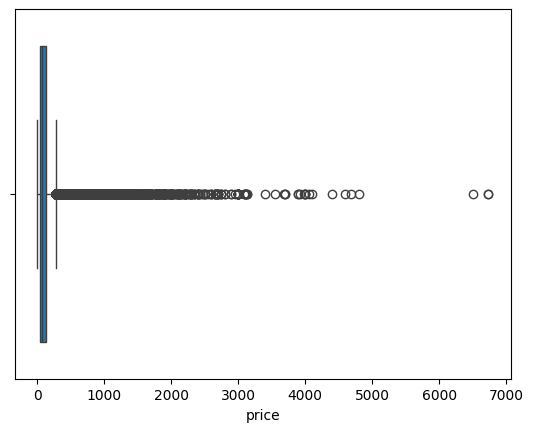

In [42]:
price = data["price"]
q25, q75 = np.percentile(price, (25,75))
iqr = q75 - q25 
min_1 = q25 - 1.5*iqr 
max_1 = q75 + 1.5*iqr
sns.boxplot(x=price)

In [43]:
data['price'].describe()

count    114635.000000
mean        119.985777
std         182.860244
min           0.850000
25%          39.900000
50%          74.900000
75%         133.000000
max        6735.000000
Name: price, dtype: float64

In [44]:
data['price'].loc[data['price'] > max_1].count()  # Count of price outliers


8554

 * The price outliers are almost 10% of the total price values which is kinda significant. So for this reason we will retain these values for further analysis.

<Axes: xlabel='review_score'>

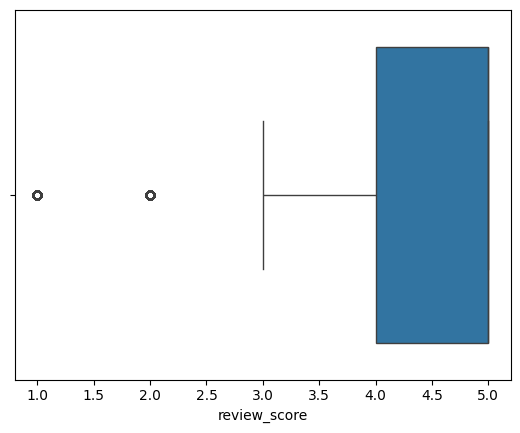

In [45]:
review_score = data["review_score"]
q25, q75 = np.percentile(review_score, (25,75))
iqr = q75 - q25 
min_3 = q25 - 1.5*iqr 
max_3 = q75 + 1.5*iqr
sns.boxplot(x=review_score)

In [46]:
data['review_score'].loc[data['review_score'] < min_3].count()  # Count of review score outliers

16867

 * The review score outliers were 16% of the total review score which is also kinda significant. We will also retain these values for further analysis.

<Axes: xlabel='freight_value'>

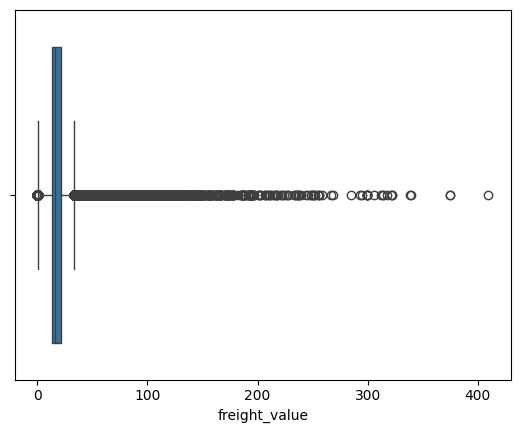

In [48]:
freight_value = data["freight_value"]
q25, q75 = np.percentile(freight_value, (25,75))
iqr = q75 - q25 
min_4 = q25 - 1.5*iqr 
max_4 = q75 + 1.5*iqr
sns.boxplot(x=freight_value)

In [49]:
data['freight_value'].loc[data['freight_value'] > max_4].count()  # Count of freight value outliers

11777

 * The freight value outliers were 10% of the total freight value which is also significant. We will retain these values for further analysis.

### **Exploratory Data Analysis** 
* Day of Week Sales Trend
                 


In [50]:
data.head()

,order_purchase_timestamp,order_delivered_customer_date,order_id,order_item_id,product_id,seller_id,customer_id,customer_unique_id,product_category_name,price,freight_value,payment_value,review_score,payment_type,customer_city,customer_state,seller_city,seller_state
0,2017-09-13 08:59:02,2017-09-20 23:43:48,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,cool stuff,58.90,13.29,72.19,5.0,credit card,campos dos goytacazes,RJ,volta redonda,SP
1,2017-04-26 10:53:06,2017-05-12 16:04:24,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,pet shop,239.90,19.93,259.83,4.0,credit card,santa fe do sul,SP,sao paulo,SP
2,2018-01-14 14:33:31,2018-01-22 13:19:16,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,moveis decoracao,199.00,17.87,216.87,5.0,credit card,para de minas,MG,borda da mata,MG
3,2018-08-08 10:00:35,2018-08-14 13:32:39,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,perfumaria,12.99,12.79,25.78,4.0,credit card,atibaia,SP,franca,SP
4,2017-02-04 13:57:51,2017-03-01 16:42:31,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,ferramentas jardim,199.90,18.14,218.04,5.0,credit card,varzea paulista,SP,loanda,PR


In [51]:
data.nunique() # Return the number of unique values of the data

order_purchase_timestamp         95953
order_delivered_customer_date    95663
order_id                         96475
order_item_id                       21
product_id                       32214
seller_id                         2970
customer_id                      96475
customer_unique_id               93355
product_category_name               74
price                             5859
freight_value                     6924
payment_value                    28546
review_score                         5
payment_type                         4
customer_city                     4085
customer_state                      27
seller_city                        595
seller_state                        22
dtype: int64

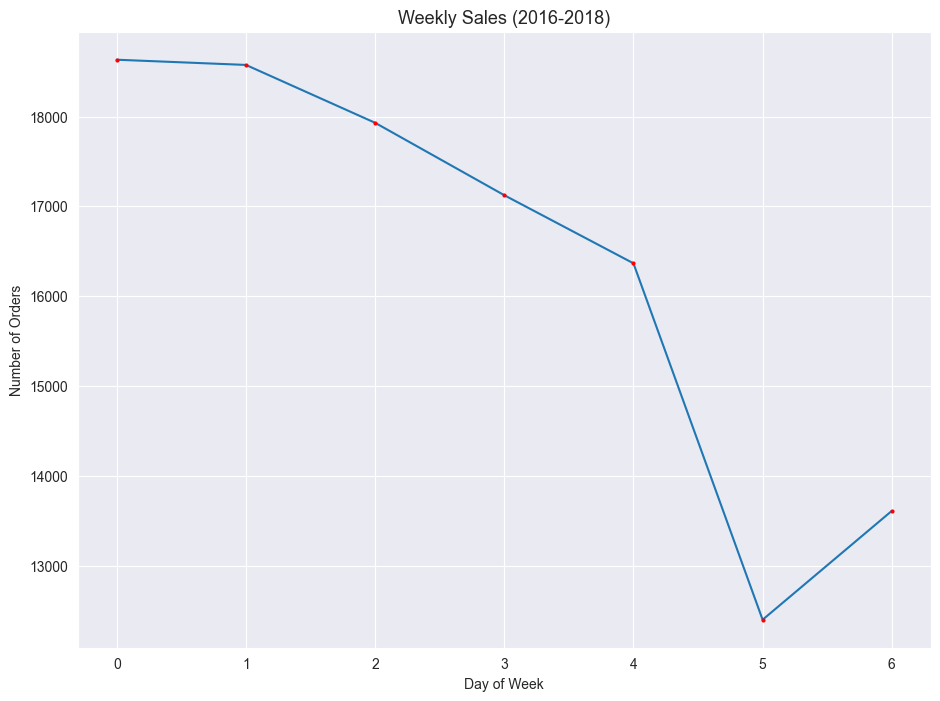

In [52]:
weekday_order = data.groupby(data['order_purchase_timestamp'].dt.dayofweek)[['order_id']].count()
weekday_order


sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(11,8));
ax.plot(weekday_order.index, weekday_order['order_id']);
ax.plot(weekday_order.index, weekday_order['order_id'], 'o', markersize = 2, color = "red");
ax.set_title("Weekly Sales (2016-2018)", fontsize = 13);
ax.set_ylabel("Number of Orders");
ax.set_xlabel("Day of Week");

###
* Monthly Sales Trend

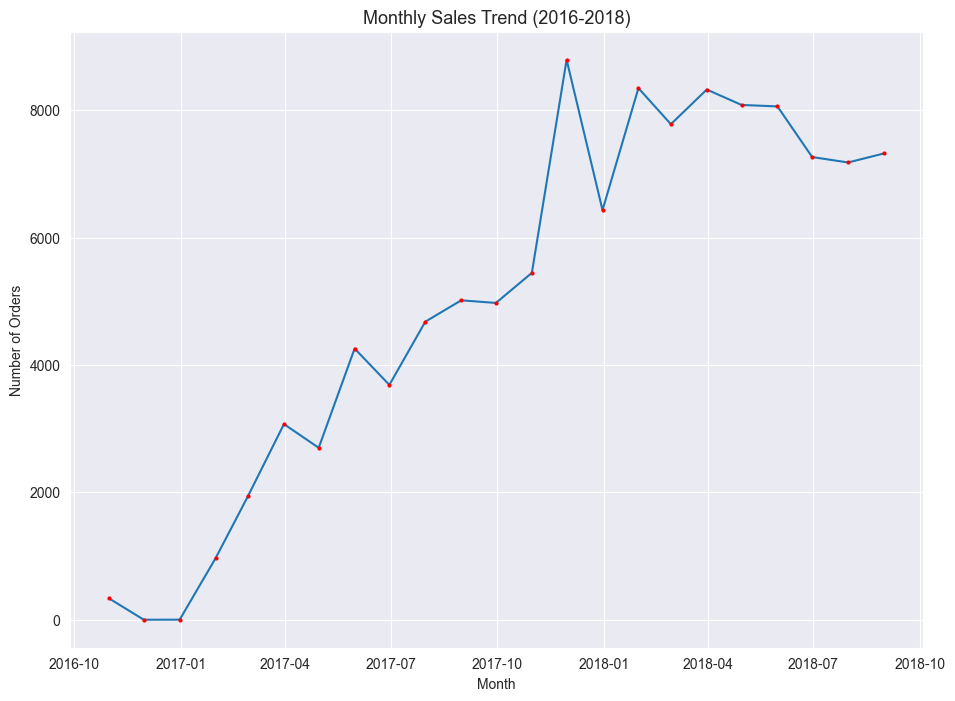

In [53]:
monthly_order = data.set_index('order_purchase_timestamp').loc[:, ['order_id']].resample('M').count()
monthly_order

fig, ax = plt.subplots(figsize=(11,8));
ax.plot(monthly_order.index, monthly_order['order_id']);
ax.plot(monthly_order.index, monthly_order['order_id'], 'o', markersize = 2, color = "red");
ax.set_title("Monthly Sales Trend (2016-2018)", fontsize = 13);
ax.set_ylabel("Number of Orders");
ax.set_xlabel("Month");

####
 * Product Categories with the Most Sales

In [54]:
high_category = data.groupby('product_category_name')[['order_id']].count().sort_values('order_id', ascending=False).reset_index() # Getting the product category with the most sales
high_category.head()

,product_category_name,order_id
0,cama mesa banho,11627
1,beleza saude,9719
2,esporte lazer,8692
3,moveis decoracao,8571
4,informatica acessorios,7917


####
 * Product Categories with the Least Sales

In [55]:
low_category = data.groupby('product_category_name')[['order_id']].count().sort_values('order_id', ascending=True).reset_index()
low_category.head()

,product_category_name,order_id
0,seguros e servicos,2
1,fashion roupa infanto juvenil,7
2,pc gamer,9
3,cds dvds musicais,14
4,portateis cozinha e preparadores de alimentos,14


In [56]:
top_categories = []
for i in range(10):   # Create a for loop for the number of product category 
     top_categories.append(high_category['product_category_name'].iloc[i])
     
top_categories


['cama mesa banho',
 'beleza saude',
 'esporte lazer',
 'moveis decoracao',
 'informatica acessorios',
 'utilidades domesticas',
 'relogios presentes',
 'telefonia',
 'ferramentas jardim',
 'automotivo']

####
 * Average Time of Delivery CategoryWise

In [57]:
delivery_analysis = data.loc[:, ('order_purchase_timestamp', 'order_delivered_customer_date', 'order_id', 'product_category_name', 'review_score')]
delivery_analysis['delivery_difference'] = delivery_analysis['order_delivered_customer_date'] - delivery_analysis['order_purchase_timestamp']
delivery_analysis['delivery_difference'] = delivery_analysis['delivery_difference'].dt.days.astype('int')  # Extract Days from time_delta
delivery_analysis.head()

,order_purchase_timestamp,order_delivered_customer_date,order_id,product_category_name,review_score,delivery_difference
0,2017-09-13 08:59:02,2017-09-20 23:43:48,00010242fe8c5a6d1ba2dd792cb16214,cool stuff,5.0,7
1,2017-04-26 10:53:06,2017-05-12 16:04:24,00018f77f2f0320c557190d7a144bdd3,pet shop,4.0,16
2,2018-01-14 14:33:31,2018-01-22 13:19:16,000229ec398224ef6ca0657da4fc703e,moveis decoracao,5.0,7
3,2018-08-08 10:00:35,2018-08-14 13:32:39,00024acbcdf0a6daa1e931b038114c75,perfumaria,4.0,6
4,2017-02-04 13:57:51,2017-03-01 16:42:31,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas jardim,5.0,25


In [58]:
product_category_delivery = delivery_analysis.groupby('product_category_name')[['delivery_difference']].mean().sort_values(by='delivery_difference', ascending = False)
product_category_delivery = product_category_delivery.head()
product_category_delivery

,delivery_difference
product_category_name,
moveis escritorio,20.529210
artigos de natal,15.282895
seguros e servicos,15.000000
fashion calcados,14.862963
casa conforto 2,13.806452


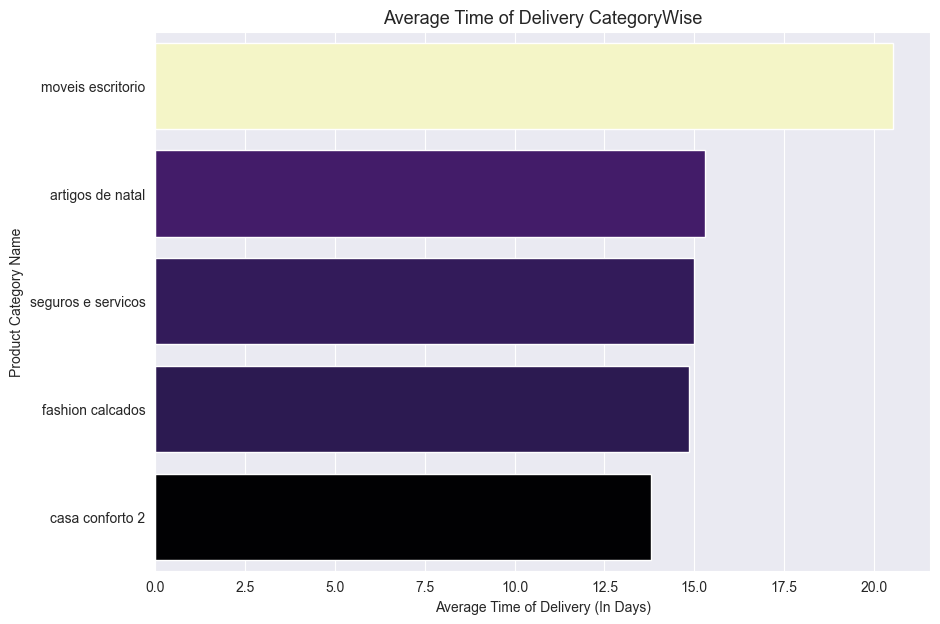

In [59]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(product_category_delivery["delivery_difference"].values.min(), product_category_delivery["delivery_difference"].values.max());
colors = plt.cm.magma(norm(product_category_delivery["delivery_difference"]));

sns.barplot(data=product_category_delivery, y=product_category_delivery.index, x=product_category_delivery['delivery_difference'], palette=colors);
ax.set_title('Average Time of Delivery CategoryWise', fontsize=13);
ax.set_xlabel('Average Time of Delivery (In Days)', fontsize=10);
ax.set_ylabel('Product Category Name');

In [60]:
top_category_delivery = delivery_analysis[delivery_analysis['product_category_name'].isin(top_categories)] #Filter to top product categories
top_category_delivery = top_category_delivery.groupby('product_category_name')[['delivery_difference']].mean().sort_values(by='delivery_difference', ascending = False)
top_category_delivery['delivery_difference'] = top_category_delivery['delivery_difference'].apply(np.ceil)
top_category_delivery

,delivery_difference
product_category_name,
ferramentas jardim,14.0
informatica acessorios,13.0
moveis decoracao,13.0
telefonia,13.0
cama mesa banho,13.0
relogios presentes,13.0
automotivo,12.0
esporte lazer,12.0
beleza saude,12.0


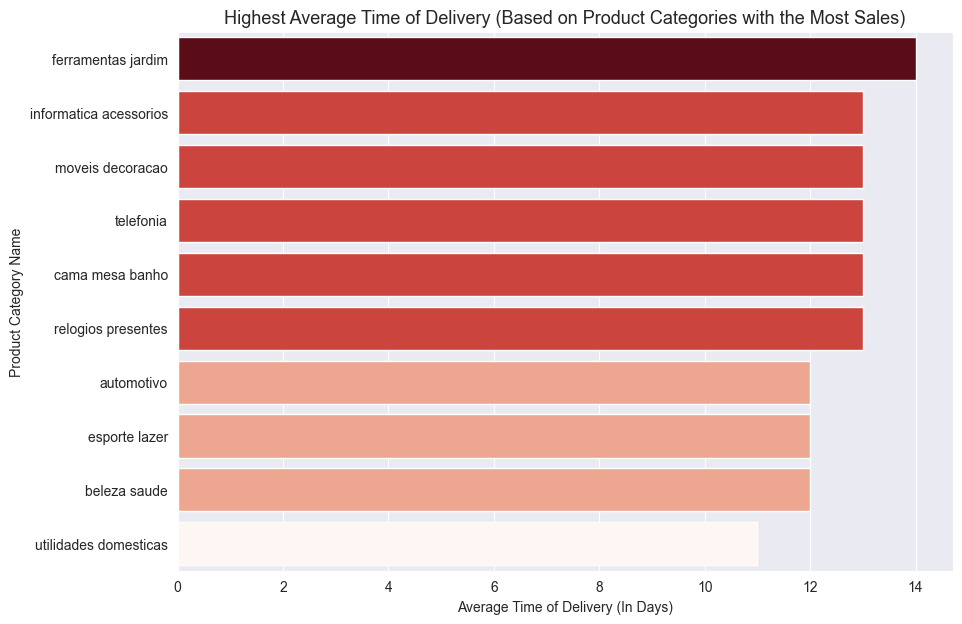

In [61]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(top_category_delivery["delivery_difference"].values.min(), top_category_delivery["delivery_difference"].values.max());
colors = plt.cm.Reds(norm(top_category_delivery["delivery_difference"]));

sns.barplot(data=top_category_delivery, y=top_category_delivery.index, x=top_category_delivery['delivery_difference'], palette=colors);
ax.set_title('Highest Average Time of Delivery (Based on Product Categories with the Most Sales)', fontsize=13);
ax.set_xlabel('Average Time of Delivery (In Days)', fontsize=10);
ax.set_ylabel('Product Category Name');

#
 * Average Order Value Analysis

In [62]:
aov = data.groupby('product_category_name').agg({'order_id':'count', 'payment_value':'mean'}).reset_index()
aov['Average Order Value'] = aov['payment_value'] / aov['order_id'] # Assigning a column for Average Order Value
aov = aov.sort_values(by='Average Order Value', ascending=False)
aov = aov.head()
aov

,product_category_name,order_id,payment_value,Average Order Value
68,seguros e servicos,2,162.255000,81.127500
61,pc gamer,9,213.890000,23.765556
66,portateis cozinha e preparadores de alimentos,14,306.100714,21.864337
37,fashion roupa infanto juvenil,7,102.711429,14.673061
46,la cuisine,16,182.095625,11.380977


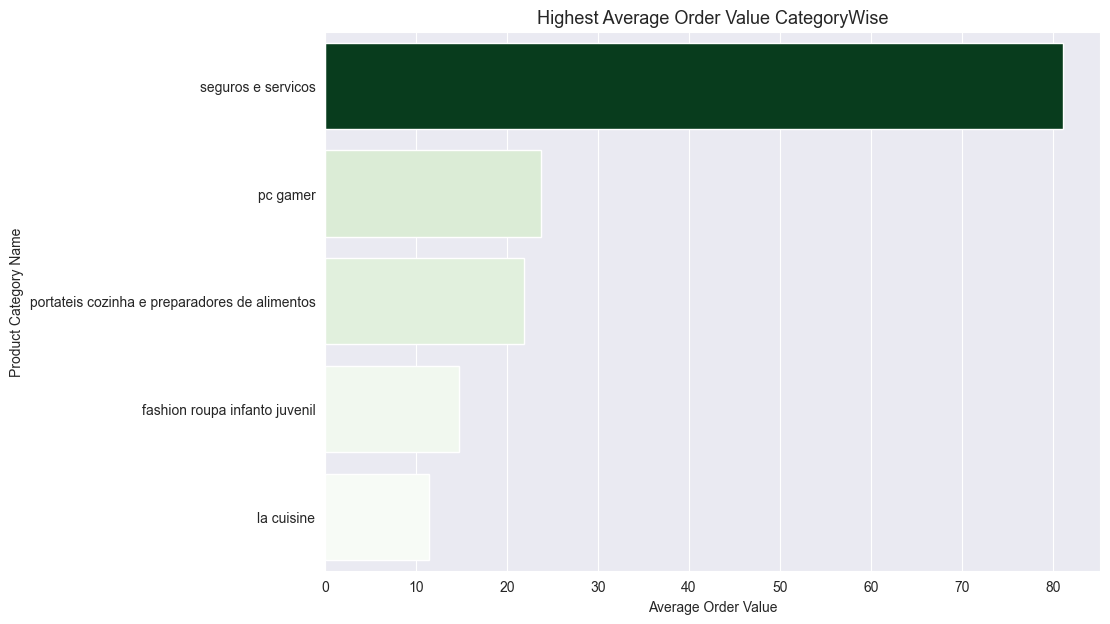

In [63]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(aov["Average Order Value"].values.min(), aov["Average Order Value"].values.max());
colors = plt.cm.Greens(norm(aov["Average Order Value"]));

sns.barplot(data=aov, y=aov['product_category_name'], x=aov["Average Order Value"], palette=colors);
ax.set_title('Highest Average Order Value CategoryWise', fontsize=13);
ax.set_xlabel('Average Order Value', fontsize=10);
ax.set_ylabel('Product Category Name');

####
 * Customer Life Time Value Analysis

In [64]:
clv = data.groupby('product_category_name').agg({'order_id':'count', 'payment_value':'mean'}).reset_index()
clv['Customer LifeTime Value'] = clv['payment_value'] * clv['order_id'] * 2  #Assigning a column for Average Order Value
clv = clv.sort_values(by='Customer LifeTime Value', ascending=False)
clv = clv.head()
clv

,product_category_name,order_id,payment_value,Customer LifeTime Value
13,cama mesa banho,11627,146.075830,3396847.36
11,beleza saude,9719,166.713289,3240572.92
44,informatica acessorios,7917,196.725585,3114952.92
54,moveis decoracao,8571,163.695337,2806065.46
67,relogios presentes,6044,229.519671,2774433.78


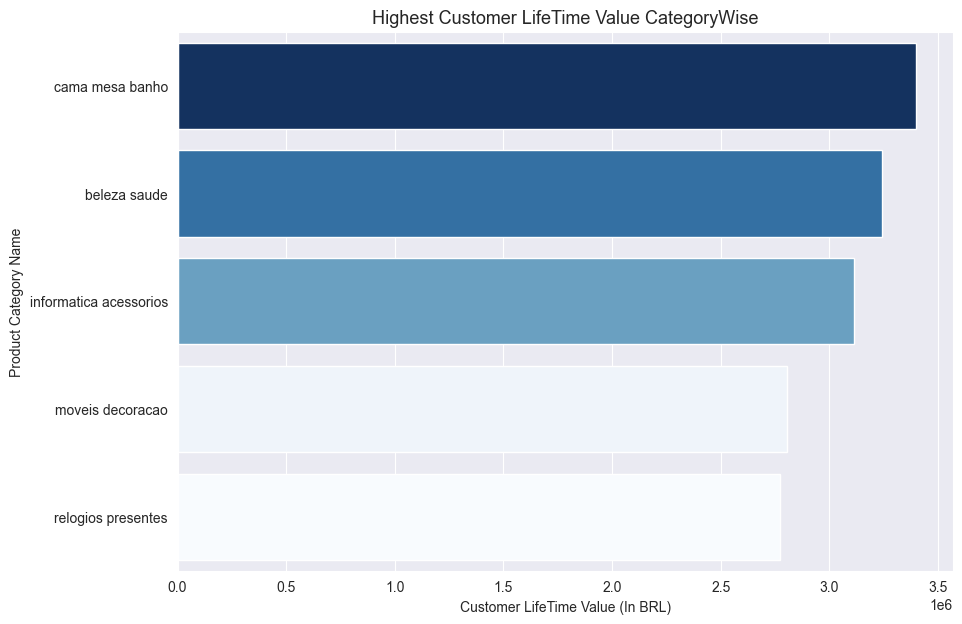

In [65]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(clv["Customer LifeTime Value"].values.min(), clv["Customer LifeTime Value"].values.max());
colors = plt.cm.Blues(norm(clv["Customer LifeTime Value"]));

sns.barplot(data=clv, y=clv['product_category_name'], x=clv["Customer LifeTime Value"], palette=colors);
ax.set_title('Highest Customer LifeTime Value CategoryWise', fontsize=13);
ax.set_xlabel('Customer LifeTime Value (In BRL)', fontsize=10);
ax.set_ylabel('Product Category Name');

In [66]:
data.head()

,order_purchase_timestamp,order_delivered_customer_date,order_id,order_item_id,product_id,seller_id,customer_id,customer_unique_id,product_category_name,price,freight_value,payment_value,review_score,payment_type,customer_city,customer_state,seller_city,seller_state
0,2017-09-13 08:59:02,2017-09-20 23:43:48,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,cool stuff,58.90,13.29,72.19,5.0,credit card,campos dos goytacazes,RJ,volta redonda,SP
1,2017-04-26 10:53:06,2017-05-12 16:04:24,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,pet shop,239.90,19.93,259.83,4.0,credit card,santa fe do sul,SP,sao paulo,SP
2,2018-01-14 14:33:31,2018-01-22 13:19:16,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,moveis decoracao,199.00,17.87,216.87,5.0,credit card,para de minas,MG,borda da mata,MG
3,2018-08-08 10:00:35,2018-08-14 13:32:39,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,perfumaria,12.99,12.79,25.78,4.0,credit card,atibaia,SP,franca,SP
4,2017-02-04 13:57:51,2017-03-01 16:42:31,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,ferramentas jardim,199.90,18.14,218.04,5.0,credit card,varzea paulista,SP,loanda,PR


 * Preferred Payment Methods of the Customers

In [67]:
type_of_payment = data.groupby('payment_type')[['order_id']].count().sort_values(by='order_id', ascending=False)
type_of_payment

,order_id
payment_type,
credit card,85062
boleto,22418
voucher,5501
debit card,1654


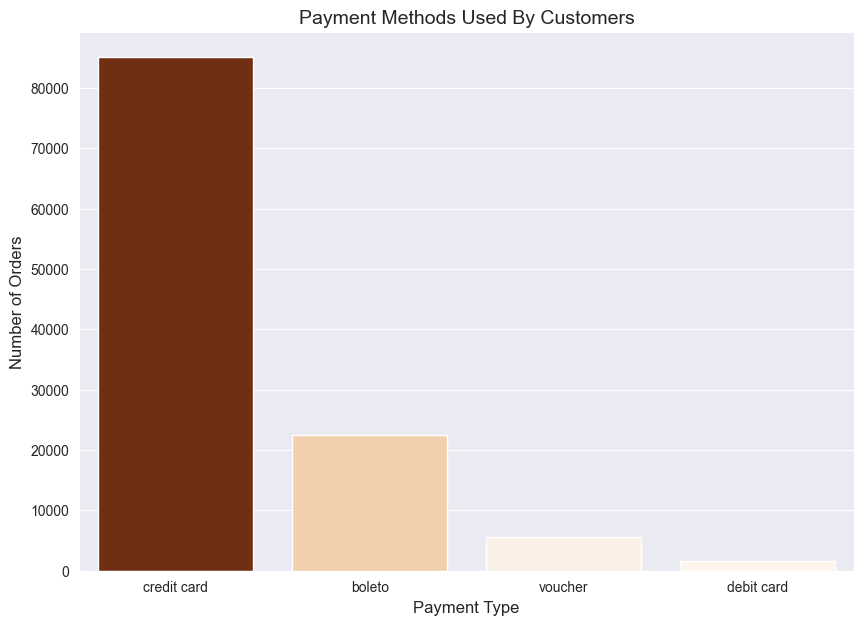

In [68]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(type_of_payment["order_id"].values.min(), type_of_payment["order_id"].values.max());
colors = plt.cm.Oranges(norm(type_of_payment["order_id"]));

sns.barplot(data=type_of_payment, y=type_of_payment["order_id"], x=type_of_payment.index, palette=colors);
ax.set_title('Payment Methods Used By Customers', fontsize=14);
ax.set_xlabel('Payment Type', fontsize=12);
ax.set_ylabel('Number of Orders', fontsize=12);

* Most Number of Sales by Location

In [69]:
number_of_orders_per_city = data.groupby('customer_city')[['order_id']].count().sort_values(by='order_id', ascending=False).head()
number_of_orders_per_city

,order_id
customer_city,
sao paulo,18081
rio de janeiro,7934
belo horizonte,3192
brasilia,2413
curitiba,1782


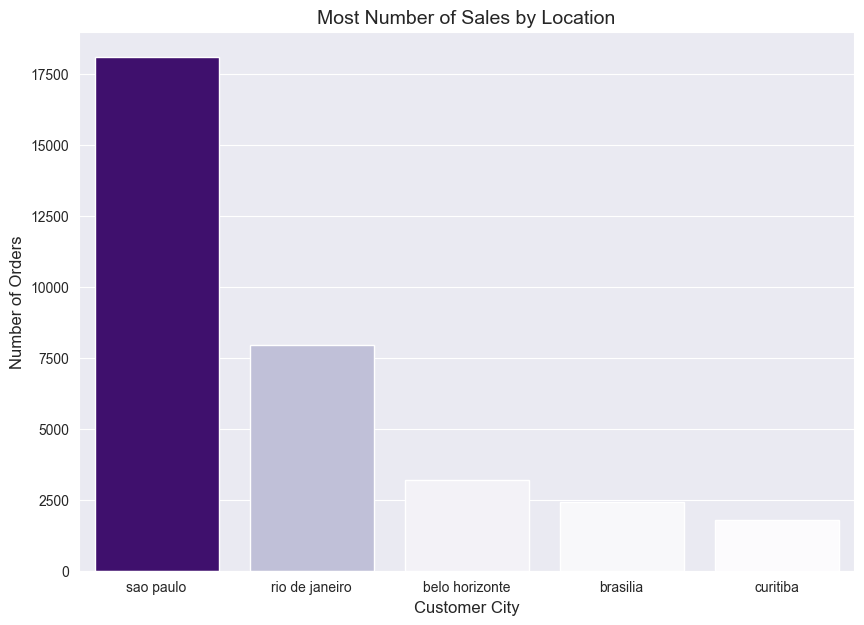

In [70]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(number_of_orders_per_city["order_id"].values.min(), number_of_orders_per_city["order_id"].values.max());
colors = plt.cm.Purples(norm(number_of_orders_per_city["order_id"]));

sns.barplot(data=number_of_orders_per_city, y=number_of_orders_per_city["order_id"], x=number_of_orders_per_city.index, palette=colors);
ax.set_title('Most Number of Sales by Location', fontsize=14);
ax.set_xlabel('Customer City', fontsize=12);
ax.set_ylabel('Number of Orders', fontsize=12);

* Customer Satisfaction Based On Review Scores

In [71]:
review_scores = delivery_analysis.groupby('product_category_name').agg({'review_score':'mean','delivery_difference':'mean'}).sort_values(by='review_score', ascending=True)
review_scores['review_score'] = review_scores['review_score'].round(decimals=0) #round score values to the integer value, round(decimals=0) equal also to round() 
review_scores['delivery_difference'] = review_scores['delivery_difference'].round(decimals=2) #round to two decimal places

In [72]:
review_scores.corr()  # No strong correlation between the two variables

,review_score,delivery_difference
review_score,1.000000,-0.126293
delivery_difference,-0.126293,1.000000


In [73]:
high_review_scores = review_scores.sort_values(by='review_score', ascending = False).head()
high_review_scores  # Product Categories with High Customer Review Scores

,review_score,delivery_difference
product_category_name,,
fashion roupa infanto juvenil,5.0,8.14
cds dvds musicais,5.0,10.36
livros importados,5.0,7.85
livros interesse geral,5.0,11.32
beleza saude,4.0,11.52


In [74]:
low_review_scores = review_scores.sort_values(by='review_score', ascending = True).head()
low_review_scores  # Product Categories with Low Customer Review Scores

,review_score,delivery_difference
product_category_name,,
seguros e servicos,2.0,15.00
pc gamer,3.0,8.56
fraldas higiene,3.0,10.24
portateis cozinha e preparadores de alimentos,3.0,7.79
dvds blu ray,4.0,12.48
